<a href="https://colab.research.google.com/github/ngoolglory/project/blob/main/ngoolglory/project/meta_code_project/Fraud_Detecting_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

약 28만건의 신용카드 거래 데이터 중에서 이상거래(Fraud)를 감지해내는 프로그램


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


구글 Colab을 사용할 경우, 적절한 작업경로를 지정해줍니다.

# Module Import

In [43]:
# Importing packages for data handling/visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing packages for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

필요한 라이브러리들을 불러옵니다.


# Data Load

In [44]:
df = pd.read_csv("/content/drive/MyDrive/메타코드 프로젝트/final/creditcard.csv", delimiter=',', dtype=np.float32)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


Pandas로 csv파일을 불러와서 확인해 줍니다. df라는 변수에 데이터가 제대로 저장되었는지 head 명령어를 통해 확인해 줍니다.

# Missing Value Check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float32
 1   V1      284807 non-null  float32
 2   V2      284807 non-null  float32
 3   V3      284807 non-null  float32
 4   V4      284807 non-null  float32
 5   V5      284807 non-null  float32
 6   V6      284807 non-null  float32
 7   V7      284807 non-null  float32
 8   V8      284807 non-null  float32
 9   V9      284807 non-null  float32
 10  V10     284807 non-null  float32
 11  V11     284807 non-null  float32
 12  V12     284807 non-null  float32
 13  V13     284807 non-null  float32
 14  V14     284807 non-null  float32
 15  V15     284807 non-null  float32
 16  V16     284807 non-null  float32
 17  V17     284807 non-null  float32
 18  V18     284807 non-null  float32
 19  V19     284807 non-null  float32
 20  V20     284807 non-null  float32
 21  V21     28

불러온 데이터를 조금 더 구체적으로 살펴봅니다. 각 변수에 대해서 missing value가 존재하는지 확인합니다. 만약 missing value가 존재할 경우 count 컬럼에 missing value의 숫자가 기록됩니다. 이 데이터에서는 missing value가 존재하지 않음을 확인할 수 있습니다. 또한 데이터 타입과 메모리 사용량도 확인 가능합니다.

In [ ]:
df.isnull().sum() / df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

만약 missing value가 존재한다면, 몇개의 missing value가 존재하는지 확인해 줍니다. missing value의 존재를 확인했다면 해당 missing value가 존재하는 row를 삭제하거나 적절한 값으로 missing value를 채워주도록 합니다. 여기서 적절한 값을 계산하는 방법은 여러가지가 존재할 수 있으며, 가장 간단하게는 평균이나 중간값을 사용할 수 있습니다.

# Correlation Visualize

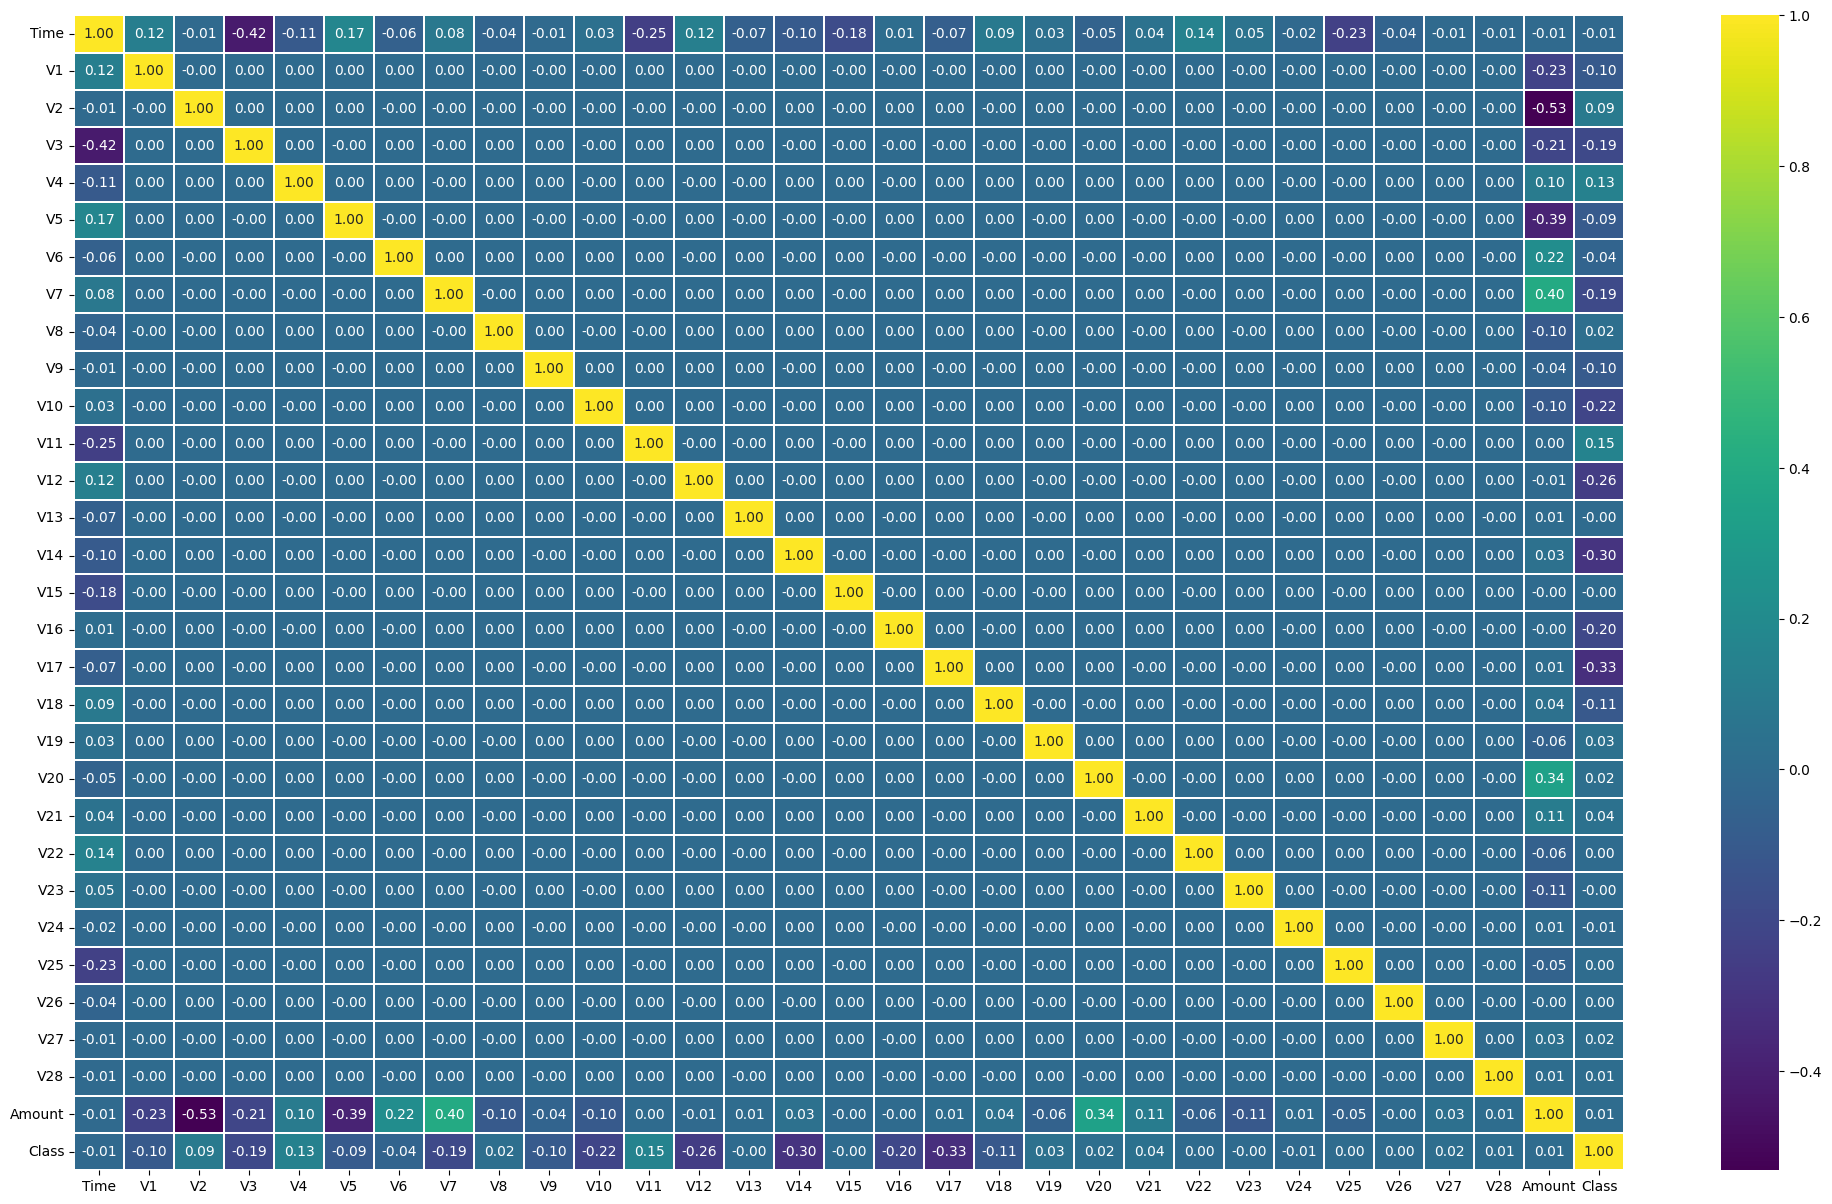

In [ ]:
f, ax = plt.subplots(figsize = (25,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.3, fmt="0.2f", ax=ax, cmap="viridis")
plt.show()

Feature들 사이의 상관관계를 확인합니다. Credit card 데이터의 경우에는 이미 한번 PCA를 거친 데이터이기 때문에 Feature들 사이의 상관관계가 매우 낮게 나옵니다. 그러나 만약 Feature들 간의 상관관계가 높게 나오는 상황을 마주하게 된다면 VIF를 통해서 다중공선성을 확인해주는것이 좋습니다.

PCA에 대한 자세한 설명: https://angeloyeo.github.io/2019/07/27/PCA.html

# Multicollinearity Check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Function to calculate VIF for multicollinearity check.
feature_df = df.drop(columns=['Time','Class'])

vif_data = pd.DataFrame()
vif_data["feature"] = feature_df.columns
vif_data["VIF"] = [variance_inflation_factor(feature_df.values, i) for i in range(feature_df.shape[1])]

# Display VIF for each independent variables.
vif_data

,feature,VIF
0,V1,1.250116
1,V2,2.362201
2,V3,1.214514
3,V4,1.047022
4,V5,1.720044
5,V6,1.225017
6,V7,1.761457
7,V8,1.051254
8,V9,1.009443
9,V10,1.049697


`VIF = 1 / (1 - R^2)` (여기서 R^2은 해당 독립변수를 제외한 회귀식의 R^2값)   
일반적으로 `VIF > 10`인 경우 문제가 있는 것으로 판단합니다.  
`VIF > 10`이라는 것은 위 식을 통해 계산해보면 `R^2 > 0.9`를 의미합니다.  
즉, 해당 독립변수가 빠져도 나머지 독립변수들이 종속변수를 90%이상 설명한다는 것입니다.  
위의 경우 Amount가 5.4로 상대적으로 높긴 하지만 10보다는 작으므로 그대로 두는 것으로 결정합니다.

# EDA (Exploaratory Data Analysis)
데이터의 전체적인 구조를 살펴봅니다.

In [45]:
df.drop(columns = "Time", inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


Time 이라는 Feature는 단순히 신용카드 거래가 이루어진 순서를 기록한 것이기 때문에 분석에 크게 도움이 되지 않습니다. \
그러므로 데이터 테이블에서 배제시켜 줍니다.

In [ ]:
print(df["Class"].value_counts())
print()
print(df["Class"].value_counts(normalize=True))

Class
0.0    284315
1.0       492
Name: count, dtype: int64

Class
0.0    0.998273
1.0    0.001727
Name: proportion, dtype: float64


0.0 : 정상거래
1.0 : 이상거래

정상거래는 28만 4315건, 이상거래는 492건이 존재합니다.
전체 데이터셋에서 오직 0.0017%가 이상거래이므로 심각한 imbalance가 존재하는 dataset임을 파악할 수 있습니다. 그러므로 일반적인 상황에서 주로 사용되는 Accuracy를 사용해서 모델의 Performance를 측정하기 어렵다는 결론이 도출됩니다. 따라서 모델을 설계할 때 Precision, Recall, 그리고 F1 Score를 사용하도록 디자인 해줍니다.

([<matplotlib.axis.XTick at 0x7cdedc76a0b0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

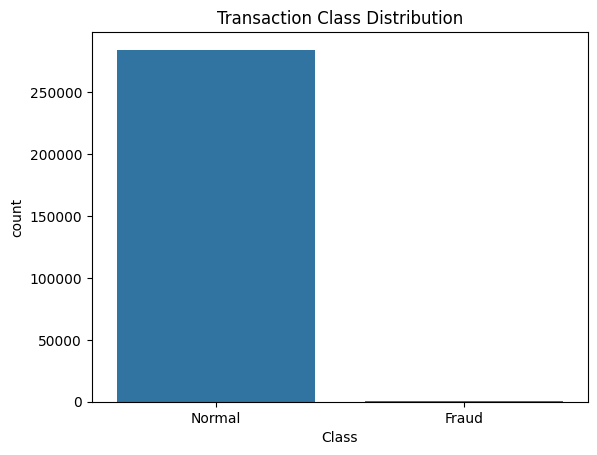

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Transaction Class Distribution")
labels = ["Normal", "Fraud"]
plt.xticks(range(2), labels)

Data imbalance가 얼마나 심한지 시각화를 통해서 확인합니다.

In [46]:
x_data = df.iloc[:,0:-1].values
y_data = df.iloc[:,[-1]].values

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(284807, 29) (284807, 1)


Feature들로 이루어진 x_data와, label을 나타내는 y_data로 원본 데이터를 분리시켜 줍니다.  
분리된 데이터는 앞으로 계산을 해주어야 하기 때문에 동일한 타입의 실수형 데이터로 저장합니다.

# Data Split

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=729)

print(x_train.shape, y_train.shape, y_train[0])
print(x_test.shape, y_test.shape, y_test[0])

(227845, 29) (227845, 1) [0.]
(56962, 29) (56962, 1) [0.]


모델링을 위해 데이터를 train set과 test set으로 분리해줍니다.  
이 때 test set에 전체 데이터의 20%를 할당하였습니다.

# Data Preprocessing - Normalization

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)
print()
print(x_test)

[[9.61837411e-01 7.70548403e-01 8.43603313e-01 ... 4.17773753e-01
  3.16530049e-01 4.28162857e-05]
 [9.45618033e-01 7.72932529e-01 8.64352524e-01 ... 4.20952857e-01
  3.16462219e-01 9.34173469e-04]
 [9.13955629e-01 7.61736333e-01 8.52032900e-01 ... 4.25895810e-01
  3.15290481e-01 6.42244297e-04]
 ...
 [9.28098977e-01 7.73571432e-01 8.44506741e-01 ... 4.10217851e-01
  3.06858748e-01 1.57447159e-03]
 [9.81180429e-01 7.55564153e-01 8.62131119e-01 ... 4.17992115e-01
  3.13532054e-01 1.16771684e-04]
 [9.48246658e-01 7.75939822e-01 8.65024209e-01 ... 4.14865285e-01
  3.10569704e-01 2.06685887e-04]]

[[9.4642645e-01 7.5774974e-01 8.7102997e-01 ... 4.1812128e-01
  3.1529665e-01 3.8923896e-03]
 [9.8076594e-01 7.5157064e-01 8.5593098e-01 ... 4.1775870e-01
  3.1373787e-01 2.7320683e-03]
 [9.9243695e-01 7.6781839e-01 8.0927753e-01 ... 4.1526228e-01
  3.1229547e-01 7.7069315e-05]
 ...
 [9.4837970e-01 7.7747995e-01 8.6257076e-01 ... 4.1798678e-01
  3.1579989e-01 7.7069315e-05]
 [9.3532932e-01 7.8202

데이터의 Scale에 따라서 결과가 왜곡되는 것을 방지하기 위해서 MinMaxScaler를 통해 데이터를 정규화해줍니다.  
Data leakage를 피하기 위해 학습 데이터를 기반으로 정규화하고, 동일한 정보(min, max)를 사용하여 테스트 데이터를 정규화합니다.

# Oversampling

In [ ]:
# Over Sampling library
import imblearn
from imblearn.over_sampling import SMOTE

# (소수 클래스 샘플 수 / 다수 클래스 샘플 수) = 0.1 가 되도록 오버샘플링
oversample = SMOTE(sampling_strategy=0.1, k_neighbors=5, random_state=729)

In [ ]:
# Oversample
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

나중에 오버샘플링을 적용한 데이터를 모델에 넣어 학습시켜보기 위해 오버샘플링 데이터를 생성해둡니다.

In [ ]:
before = pd.DataFrame(y_train, columns=['Before'])
after = pd.DataFrame(y_train_over, columns=['After'])
print(before['Before'].value_counts())
print(after['After'].value_counts())

Before
0.0    227457
1.0       388
Name: count, dtype: int64
After
0.0    227457
1.0     22745
Name: count, dtype: int64


Text(0.5, 1.0, 'After')

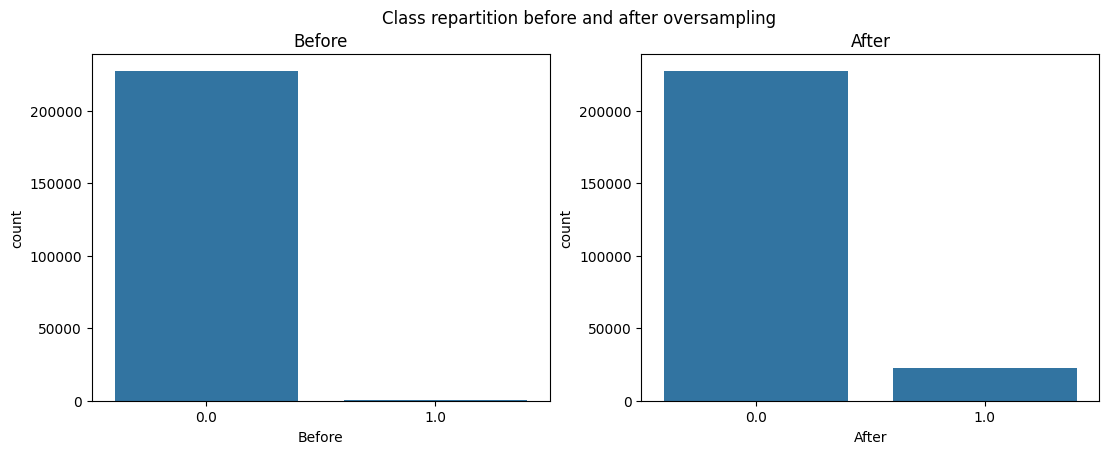

In [ ]:
# Visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Before", data=before, ax=axs[0])
sns.countplot(x="After", data=after, ax=axs[1])

fig.suptitle("Class repartition before and after oversampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

1인 class의 샘플 수가 증가한 것이 확인됩니다.

# Undersampling  

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

# (소수 클래스 샘플 수 / 다수 클래스 샘플 수) = 0.5 가 되도록 언더샘플링
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=729)

In [ ]:
# Undersample
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

나중에 언더샘플링을 적용한 데이터를 모델에 넣어 학습시켜보기 위해 언더샘플링 데이터를 생성해둡니다.

In [ ]:
before = pd.DataFrame(y_train, columns=['Before'])
after = pd.DataFrame(y_train_under, columns=['After'])
print(before['Before'].value_counts())
print(after['After'].value_counts())

Before
0.0    227457
1.0       388
Name: count, dtype: int64
After
0.0    776
1.0    388
Name: count, dtype: int64


Text(0.5, 1.0, 'After')

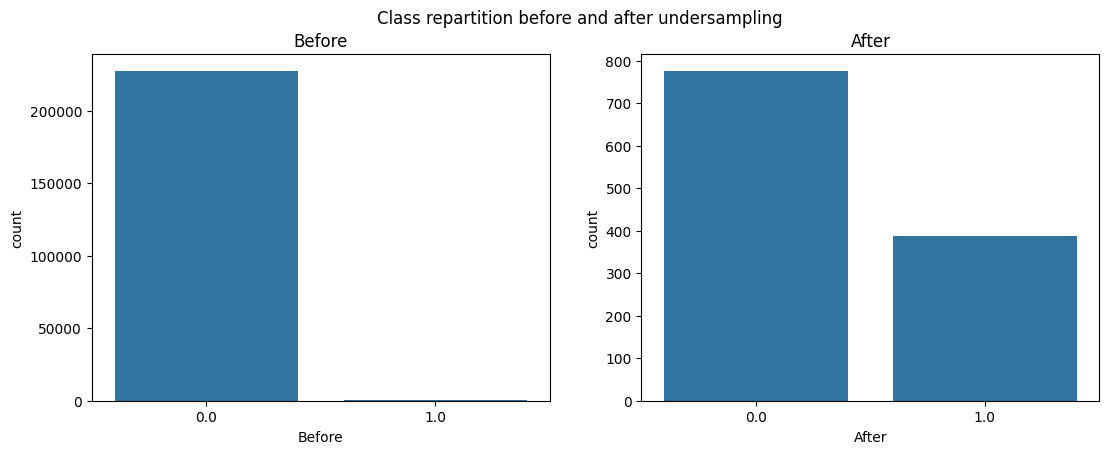

In [ ]:
# Visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Before", data=before, ax=axs[0])
sns.countplot(x="After", data=after, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

0인 class의 샘플 수가 감소한 것이 확인됩니다.

# t-SNE (t-distributed Stochastic Neighbor Embedding)

t-SNE는 고차원 데이터를 저차원 영역으로 표현하기 위한 비선형 차원 축소 기법입니다.  
PCA는 데이터의 분산을 최대한 보존하는 축을 찾아서 차원을 축소하는 기법인 반면, t-SNE는 확률 분포를 이용하여 고차원 데이터와 저차원 데이터 간의 유사도를 계산하고 최적화하는 기법입니다.  
PCA는 데이터가 선형적으로 구성되어 있는 경우 유리한 데 반해, t-SNE는 선형적 & 비선형적 데이터 모두 잘 표현해냅니다.  
이 데이터가 비선형적인 패턴을 갖고 있을 가능성을 고려하여 t-SNE로 시각화해주도록 하겠습니다.

원 데이터는 크기가 너무 커서 시간이 너무 오래 걸리는 관계로 undersampling된 데이터로 시각화하였습니다.

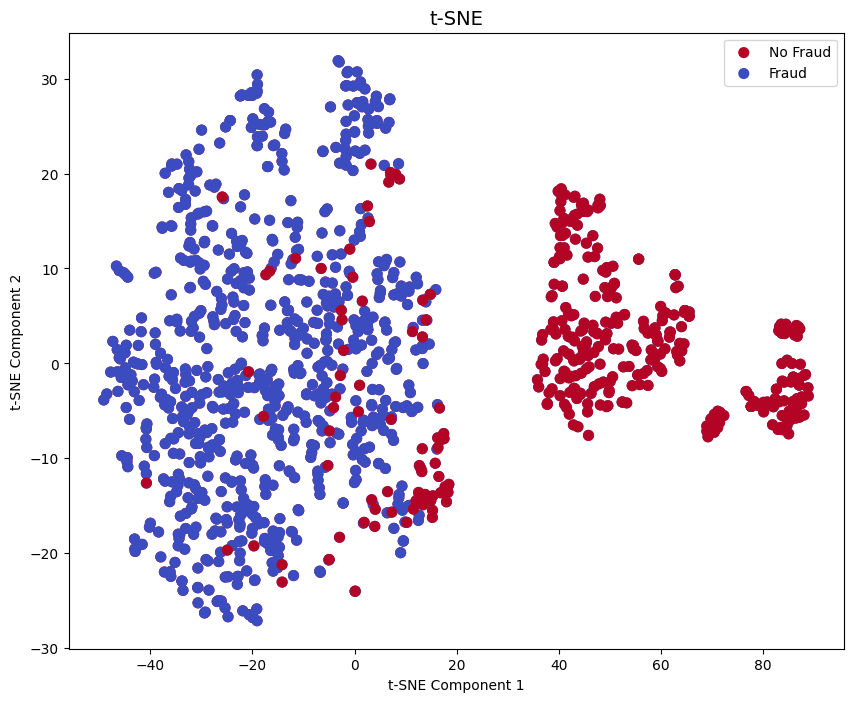

In [ ]:
from sklearn.manifold import TSNE

# t-SNE 모델 생성 및 적용
tsne = TSNE(n_components=2, random_state=729)
x_tsne = tsne.fit_transform(x_train_under)

# t-SNE scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=(y_train_under == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=(y_train_under == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('t-SNE', fontsize=14)
plt.legend()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Metrics Table

In [8]:
# Function for saving metric data to df and displaying the df

model_eval = pd.DataFrame({
    'model' : [''],
    'acc_test' : [0],
    'precision_test' : [0],
    'recall_test' : [0],
    'f1_score_test' : [0]
})

def add_model_eval(model, acc_test, precision_test, recall_test, f1_score_test):

    model_eval['model'] = model
    model_eval['acc_test'] = f'{acc_test: .2f}'
    model_eval['precision_test'] =  f'{precision_test: .2f}'
    model_eval['recall_test'] = f'{recall_test: .2f}'
    model_eval['f1_score_test'] = f'{f1_score_test: .2f}'
    return model_eval

def view_models_eval(df_results):
    df_results = pd.concat([df_results, model_eval], axis=0)
    df_results = df_results.sort_values(by=['recall_test'], ascending=False).reset_index(drop=True)  # recall을 기준으로 내림차순 정렬
    return df_results

각 모델에서 나오는 성능을 기록하기 위한 데이터 프레임을 만드는 함수를 정의합니다.

In [ ]:
# Create dataframe
df_metrics_table = pd.DataFrame()

빈 데이터 프레임을 생성합니다.  
이곳에 각 모델의 성능이 기록되게 됩니다.

# Logistic Regression (sklearn)

In [ ]:
# Train the model
model1 = LogisticRegression(random_state=729)
logit = model1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predictions
y_pred_logit = model1.predict(x_test)

In [ ]:
# Scores
lr_acc_test = metrics.accuracy_score(y_test, y_pred_logit)
lr_precision_test = metrics.precision_score(y_test, y_pred_logit)
lr_recall_test = metrics.recall_score(y_test, y_pred_logit)
lr_f1_test = metrics.f1_score(y_test, y_pred_logit)

print("Accuracy Logit:", metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:", metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:", metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:", metrics.f1_score(y_test, y_pred_logit))

add_model_eval('Logistic Regression',lr_acc_test, lr_precision_test, lr_recall_test, lr_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy Logit: 0.9989642217618764
Precision Logit: 0.8947368421052632
Recall Logit: 0.49038461538461536
F1 Score Logit: 0.6335403726708074


,model,acc_test,precision_test,recall_test,f1_score_test
0,Logistic Regression,1.00,0.89,0.49,0.63


99.9%의 상당히 높은 Accuracy를 보입니다.
그러나 위에서 살펴본 바에 의하면 dataset이 매우 imbalance 했으므로, Accuracy는 모델을 평가하는 적절한 metric이 될 수 없습니다.
그러므로 Precision, Recall, f1 score를 중심으로 모델을 평가하도록 합니다.  
  
    
**그 중에서도 특히 이 주제에서는 Recall을 높이는 데 집중해야 합니다.**  
사기인데 사기가 아니라고 말하는 것, 즉 FP가 가장 위험합니다.   
이 척도가 줄어들 때 직접적으로 높아지는 성능지표가 바로 recall이기 때문에 본 문제에서는 높은 recall을 확보하는 것이 가장 중요하다고 할 수 있습니다.

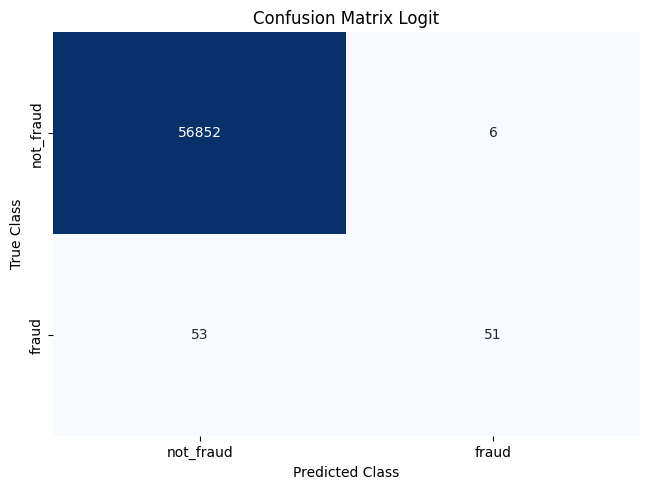

In [ ]:
# Confusion Matrix
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_logit_proba = model1.predict_proba(x_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.966901856717274


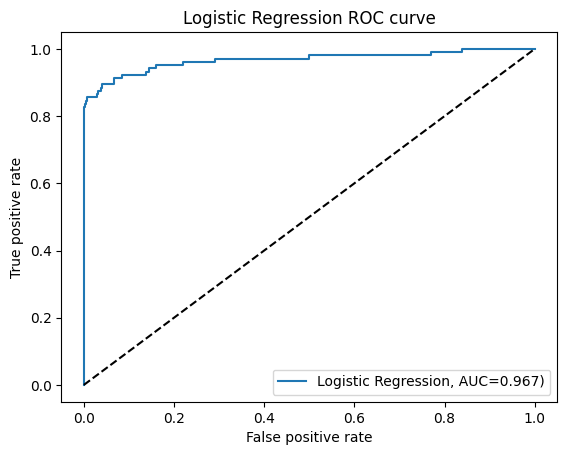

In [ ]:
# ROC
plt.plot(fpr_logit, tpr_logit, label=f"Logistic Regression, AUC={auc_logit:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

# SVM  
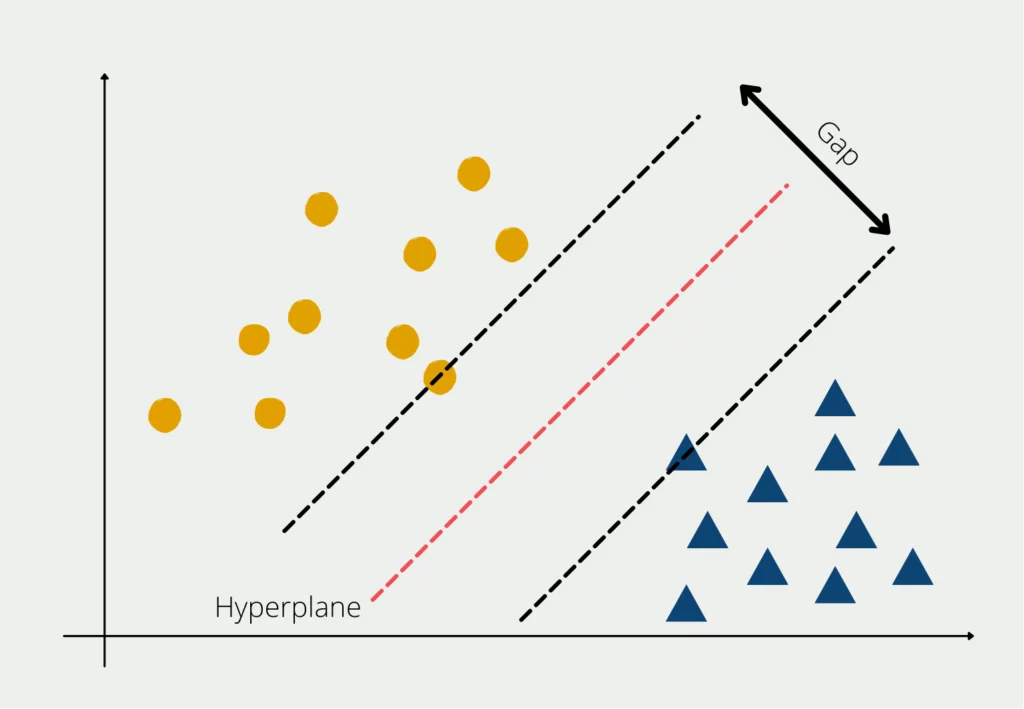

In [ ]:
# Train the model
model2 = SVC(probability=True, random_state=729)
svm = model2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predictions
y_pred_svm = model2.predict(x_test)

In [ ]:
# Scores
svm_acc_test = metrics.accuracy_score(y_test, y_pred_svm)
svm_precision_test = metrics.precision_score(y_test, y_pred_svm)
svm_recall_test = metrics.recall_score(y_test, y_pred_svm)
svm_f1_test = metrics.f1_score(y_test, y_pred_svm)

print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))

add_model_eval('SVM',svm_acc_test, svm_precision_test, svm_recall_test, svm_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy SVM: 0.9994382219725431
Precision SVM: 0.875
Recall SVM: 0.8076923076923077
F1 Score SVM: 0.8400000000000001


,model,acc_test,precision_test,recall_test,f1_score_test
0,SVM,1.00,0.88,0.81,0.84
1,Logistic Regression,1.00,0.89,0.49,0.63


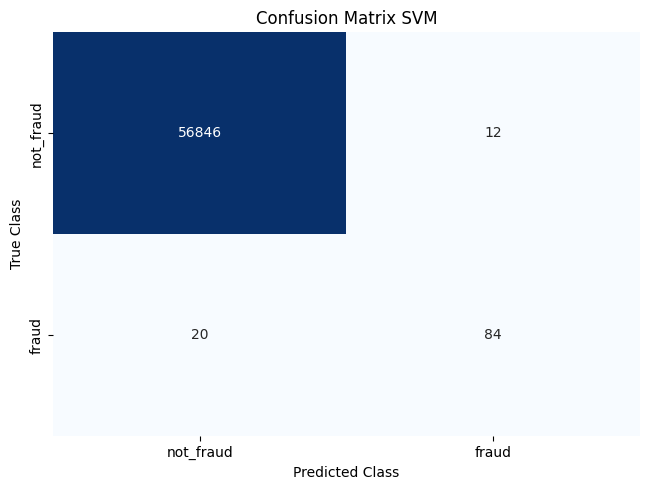

In [ ]:
# CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_svm_proba = model2.predict_proba(x_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.9505167394074847


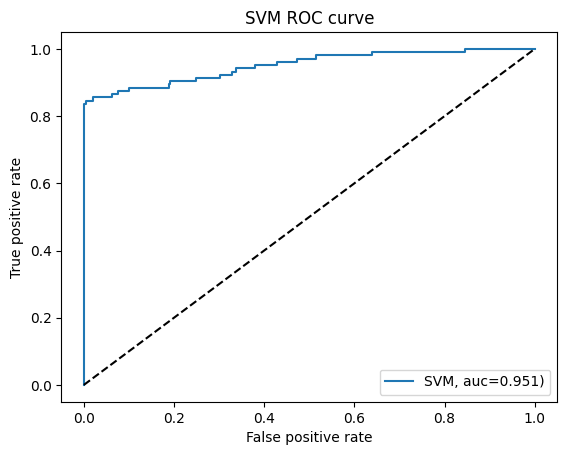

In [ ]:
# ROC
plt.plot(fpr_svm,tpr_svm,label=f"SVM, auc={auc_svm:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

# Ensemble learning : Bagging (Random Forest)  
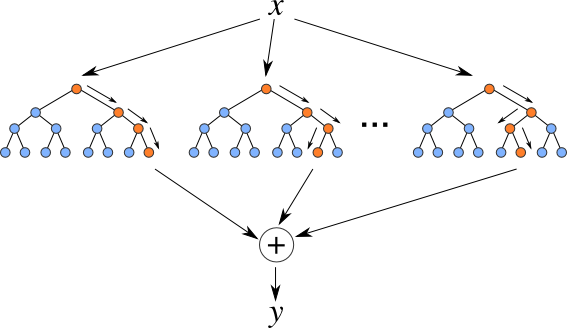

In [ ]:
# Train the model
model3 = RandomForestClassifier(random_state=729)
rf = model3.fit(x_train, y_train)

<ipython-input-120-6db3428a8b0a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = model3.fit(x_train, y_train)


In [ ]:
# Predictions
y_pred_rf = model3.predict(x_test)

In [ ]:
# Scores
rf_acc_test = metrics.accuracy_score(y_test, y_pred_rf)
rf_precision_test = metrics.precision_score(y_test, y_pred_rf)
rf_recall_test = metrics.recall_score(y_test, y_pred_rf)
rf_f1_test = metrics.f1_score(y_test, y_pred_rf)

print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

add_model_eval('Random Forest',rf_acc_test, rf_precision_test, rf_recall_test, rf_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy RF: 0.9996137776061234
Precision RF: 0.9880952380952381
Recall RF: 0.7980769230769231
F1 Score RF: 0.8829787234042553


,model,acc_test,precision_test,recall_test,f1_score_test
0,SVM,1.00,0.88,0.81,0.84
1,Random Forest,1.00,0.99,0.80,0.88
2,Logistic Regression,1.00,0.89,0.49,0.63


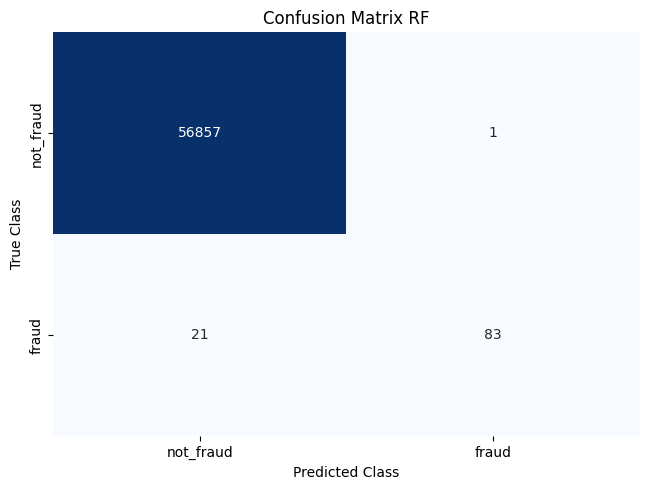

In [ ]:
# CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_rf_proba = model3.predict_proba(x_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9262333187671311


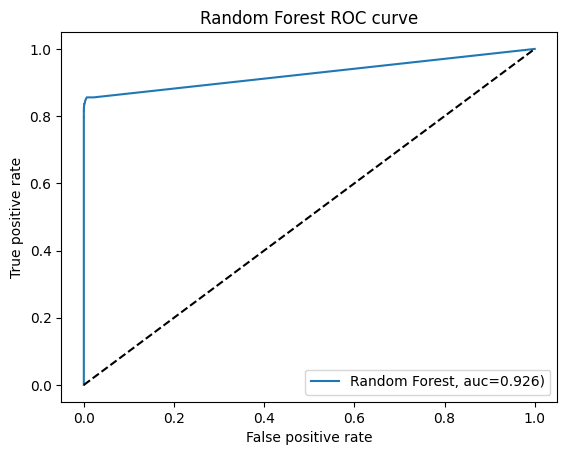

In [ ]:
# ROC
plt.plot(fpr_rf,tpr_rf,label=f"Random Forest, auc={auc_rf:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

# Ensemble learning : Boosting (XGBoost)  
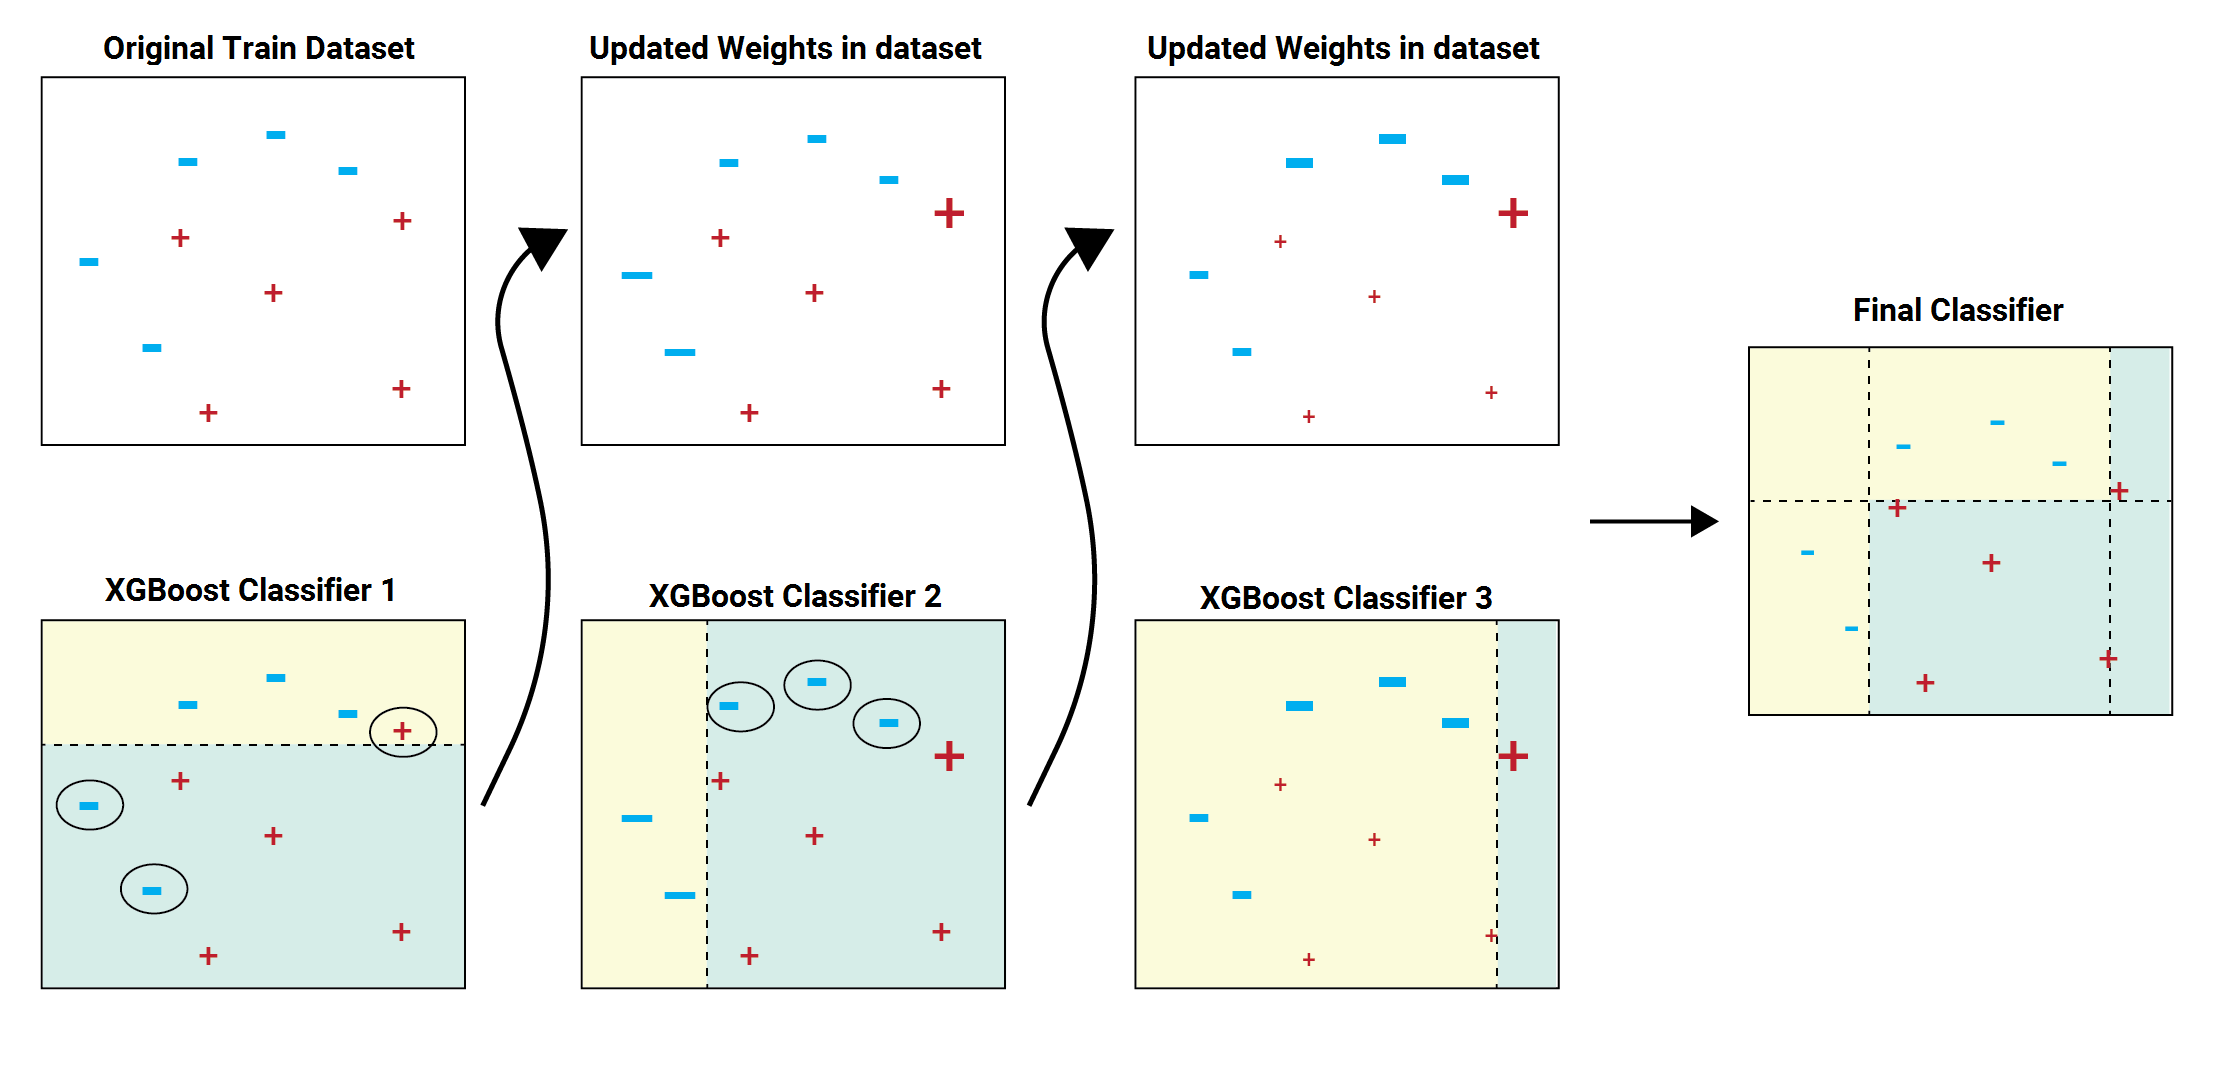

XGBoost는 class imbalance가 있는 데이터에 효과적이라고 알려져 있습니다.  
순차적으로 가중치를 업데이트 하되, 분류가 틀린 경우 해당 샘플의 가중치를 증가시키는 방식으로 가중치 업데이트가 진행됩니다.

In [ ]:
# Train the model
model4 = XGBClassifier(random_state=729)
xgb = model4.fit(x_train, y_train)

In [ ]:
# Predictions
y_pred_xgb = model4.predict(x_test)

In [ ]:
# Scores
xgb_acc_test = metrics.accuracy_score(y_test, y_pred_xgb)
xgb_precision_test = metrics.precision_score(y_test, y_pred_xgb)
xgb_recall_test = metrics.recall_score(y_test, y_pred_xgb)
xgb_f1_test = metrics.f1_score(y_test, y_pred_xgb)

print("Accuracy XGB:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision XGB:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score XGB:",metrics.f1_score(y_test, y_pred_xgb))

add_model_eval('XGB',xgb_acc_test, xgb_precision_test, xgb_recall_test, xgb_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy XGB: 0.9996488887328394
Precision XGB: 1.0
Recall XGB: 0.8076923076923077
F1 Score XGB: 0.8936170212765957


,model,acc_test,precision_test,recall_test,f1_score_test
0,SVM,1.00,0.88,0.81,0.84
1,XGB,1.00,1.00,0.81,0.89
2,Random Forest,1.00,0.99,0.80,0.88
3,Logistic Regression,1.00,0.89,0.49,0.63


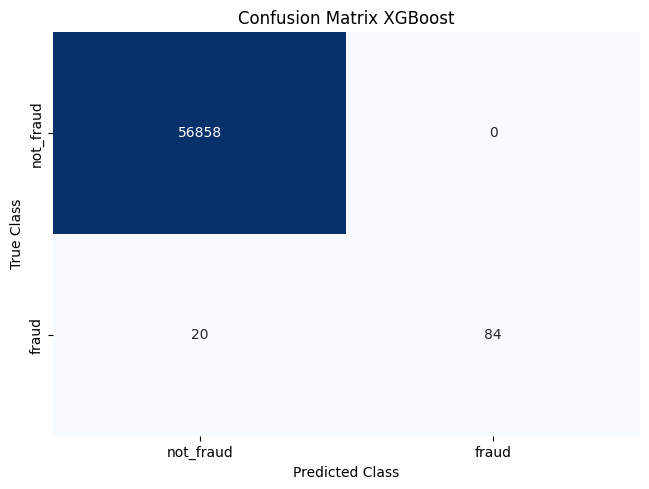

In [ ]:
# CM matrix
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_xgb_proba = model4.predict_proba(x_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

AUC XGBoost : 0.9607603760515401


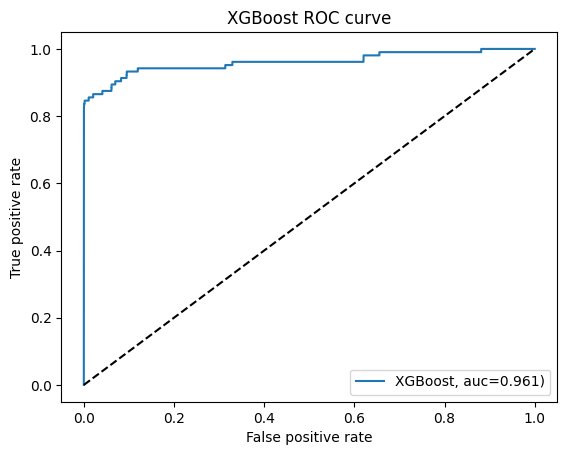

In [ ]:
# ROC
plt.plot(fpr_xgb,tpr_xgb,label=f"XGBoost, auc={auc_xgb:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

# LGBM (Light Gradiant Boosting Model)

LGBM은 성능을 조금 포기하더라도 학습 속도를 극도로 끌어올리는 것을 목표로 한 모델입니다.  
사실상 성능 하락은 매우 미미하지만 다른 부스팅 모델에 비해 학습 속도가 매우 빠릅니다.  
그러나 성능면에서는 XGBoost 보다 좋기는 어렵습니다.  
(아래의 경우 하이퍼파라미터를 조정했기 때문에 XGBoost보다 성능이 더 높게 나온 것으로 보이며, XGBoost 모델도 하이퍼파라미터 튜닝을 진행한다면 이보다 더 좋은 성능을 보일 수 있을 것으로 기대됩니다.)

In [ ]:
# Train the model
model5 = LGBMClassifier(n_estimators=1000,          # 트리의 개수 (많을 수록 복잡성 증가)
                        num_leaves=64,              # 각 트리의 최대 leaf node의 개수 (많을 수록 복잡성 증가)
                        n_jobs=-1,                  # 병렬 처리에 사용할 CPU 코어의 개수 (-1일 경우 모든 가능한 CPU 코어 사용)
                        verbosity=-1,               # 학습 중 메세지 출력 정도
                        boost_from_average=False)   # 극도의 클래스 불균형이 있는 경우 True로 지정하면 recall을 매우 저하시킴
lgbm = model5.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Predictions
y_pred_lgbm = model5.predict(x_test)

In [ ]:
# Scores
lgbm_acc_test = metrics.accuracy_score(y_test, y_pred_lgbm)
lgbm_precision_test = metrics.precision_score(y_test, y_pred_lgbm)
lgbm_recall_test = metrics.recall_score(y_test, y_pred_lgbm)
lgbm_f1_test = metrics.f1_score(y_test, y_pred_lgbm)

print("Accuracy LightGBM:",metrics.accuracy_score(y_test, y_pred_lgbm))
print("Precision LightGBM:",metrics.precision_score(y_test, y_pred_lgbm))
print("Recall LightGBM:",metrics.recall_score(y_test, y_pred_lgbm))
print("F1 Score LightGBM:",metrics.f1_score(y_test, y_pred_lgbm))

add_model_eval('LightGBM', lgbm_acc_test, lgbm_precision_test, lgbm_recall_test, lgbm_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy LightGBM: 0.9996664442961974
Precision LightGBM: 1.0
Recall LightGBM: 0.8173076923076923
F1 Score LightGBM: 0.8994708994708994


,model,acc_test,precision_test,recall_test,f1_score_test
0,LightGBM,1.00,1.00,0.82,0.90
1,SVM,1.00,0.88,0.81,0.84
2,XGB,1.00,1.00,0.81,0.89
3,Random Forest,1.00,0.99,0.80,0.88
4,Logistic Regression,1.00,0.89,0.49,0.63


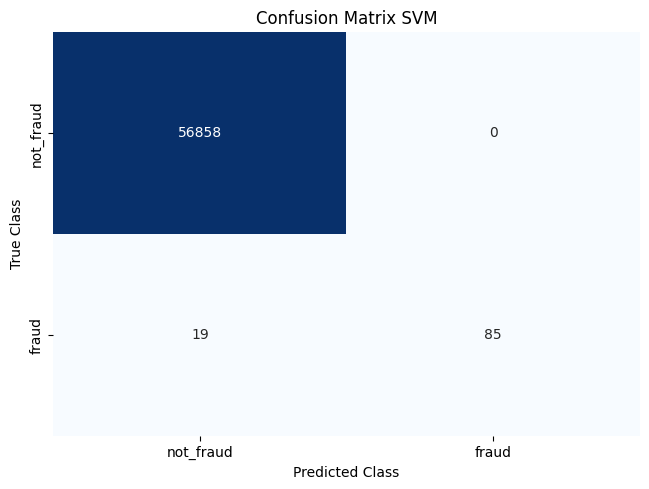

In [ ]:
# CM matrix
matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
cm_lgbm = pd.DataFrame(matrix_lgbm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_lgbm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_lgbm_proba = model5.predict_proba(x_test)[::,1]
fpr_lgbm, tpr_lgbm, _ = metrics.roc_curve(y_test, y_pred_lgbm_proba)
auc_lgbm = metrics.roc_auc_score(y_test, y_pred_lgbm_proba)
print("AUC LightGBM :", auc_lgbm)

AUC LightGBM : 0.9696193215486894


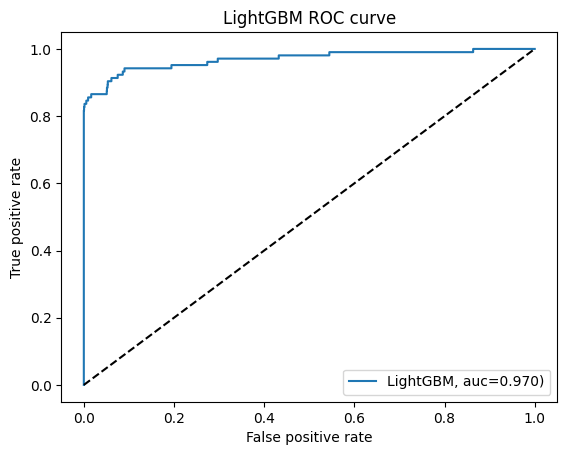

In [ ]:
# ROC
plt.plot(fpr_lgbm,tpr_lgbm,label=f"LightGBM, auc={auc_lgbm:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LightGBM ROC curve')
plt.legend(loc=4)
plt.show()

# Multi Layer Perceptron (sklearn)     
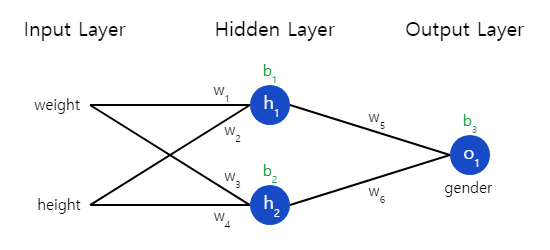

In [ ]:
# Train the model
model6 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=729)
mlp = model6.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model6.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 729,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
# Predictions
y_pred_mlp = model6.predict(x_test)

In [ ]:
# Scores
mlp_acc_test = metrics.accuracy_score(y_test, y_pred_mlp)
mlp_precision_test = metrics.precision_score(y_test, y_pred_mlp)
mlp_recall_test = metrics.recall_score(y_test, y_pred_mlp)
mlp_f1_test = metrics.f1_score(y_test, y_pred_mlp)

print("Accuracy MLP:",metrics.accuracy_score(y_test, y_pred_mlp))
print("Precision MLP:",metrics.precision_score(y_test, y_pred_mlp))
print("Recall MLP:",metrics.recall_score(y_test, y_pred_mlp))
print("F1 Score MLP:",metrics.f1_score(y_test, y_pred_mlp))

add_model_eval('MLP',mlp_acc_test, mlp_precision_test, mlp_recall_test, mlp_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy MLP: 0.9994733330992591
Precision MLP: 0.9111111111111111
Recall MLP: 0.7884615384615384
F1 Score MLP: 0.845360824742268


,model,acc_test,precision_test,recall_test,f1_score_test
0,LightGBM,1.00,1.00,0.82,0.90
1,SVM,1.00,0.88,0.81,0.84
2,XGB,1.00,1.00,0.81,0.89
3,Random Forest,1.00,0.99,0.80,0.88
4,MLP,1.00,0.91,0.79,0.85
5,Logistic Regression,1.00,0.89,0.49,0.63


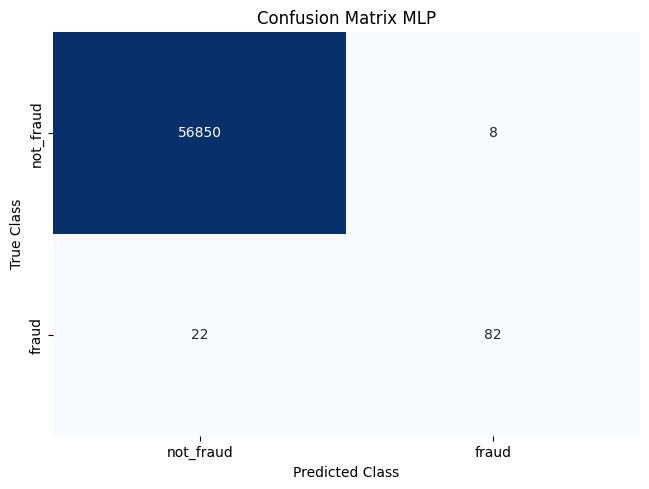

In [ ]:
# CM matrix
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
# AUC
y_pred_mlp_proba = model6.predict_proba(x_test)[::,1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test,  y_pred_mlp_proba)
auc_mlp = metrics.roc_auc_score(y_test, y_pred_mlp_proba)
print("AUC MLP :", auc_mlp)

AUC MLP : 0.9643883412658254


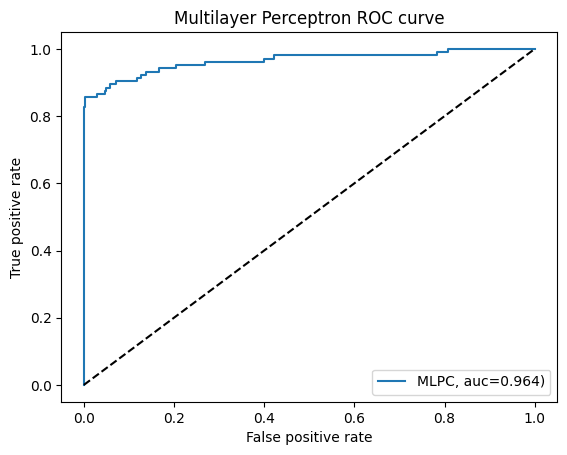

In [ ]:
# ROC
plt.plot(fpr_mlp,tpr_mlp,label=f"MLPC, auc={auc_mlp:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Multilayer Perceptron ROC curve')
plt.legend(loc=4)
plt.show()

# Artificial Neural Network (Tensorflow)   

In [49]:
# Train the model
model = Sequential()
model.add(Dense(256, input_shape=(x_train.shape[-1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [50]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001) # optimizer

model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.Recall()]) # metrics

In [51]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss',         # 모니터링할 지표 선택
                                                min_delta=0,                # 모델의 성능이 향상되었다고 간주되는 최소 변화량
                                                patience=15,                # 성능 향상이 없을 때 몇 epoch를 기다릴지 지정
                                                verbose=1,                  # 학습 과정을 출력할지 여부를 지정 (0: 출력X, 1: 출력O)
                                                mode='auto',                # 모니터링 지표를 어떻게 해석할지를 지정
                                                baseline=None,              # 모델의 성능을 비교할 기준값을 지정
                                                restore_best_weights=False) # 조기 종료 시 가장 좋은 성능을 달성한 시점의 모델 가중치를 복원할지 여부를 지정

In [52]:
history = model.fit(x_train, y_train, epochs=500, batch_size=131072, validation_split=0.15, verbose=1,
                    callbacks=[earlystopper])
history_dict = history.history

Epoch 1/500
2/2 [==============================] - 3s 325ms/step - loss: 0.9257 - recall_5: 0.6289 - val_loss: 0.7927 - val_recall_5: 1.0000
Epoch 2/500
2/2 [==============================] - 0s 118ms/step - loss: 0.9042 - recall_5: 0.6447 - val_loss: 0.7790 - val_recall_5: 1.0000
Epoch 3/500
2/2 [==============================] - 0s 107ms/step - loss: 0.8875 - recall_5: 0.6478 - val_loss: 0.7641 - val_recall_5: 1.0000
Epoch 4/500
2/2 [==============================] - 0s 112ms/step - loss: 0.8748 - recall_5: 0.7421 - val_loss: 0.7488 - val_recall_5: 1.0000
Epoch 5/500
2/2 [==============================] - 0s 100ms/step - loss: 0.8662 - recall_5: 0.7138 - val_loss: 0.7339 - val_recall_5: 1.0000
Epoch 6/500
2/2 [==============================] - 0s 110ms/step - loss: 0.8600 - recall_5: 0.7327 - val_loss: 0.7198 - val_recall_5: 1.0000
Epoch 7/500
2/2 [==============================] - 0s 107ms/step - loss: 0.8499 - recall_5: 0.7610 - val_loss: 0.7069 - val_recall_5: 0.9714
Epoch 8/500
2

batch size는 일반적으로 샘플 수의 절반정도로 설정하는 것이 좋다고 합니다.  

Text(0.5, 0, 'Epochs')

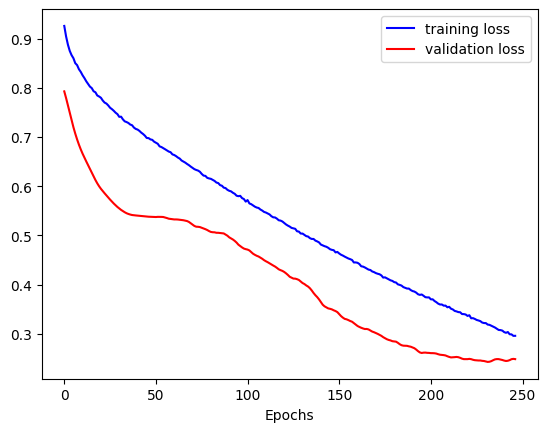

In [53]:
# Visualize train/validation loss
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='validation loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

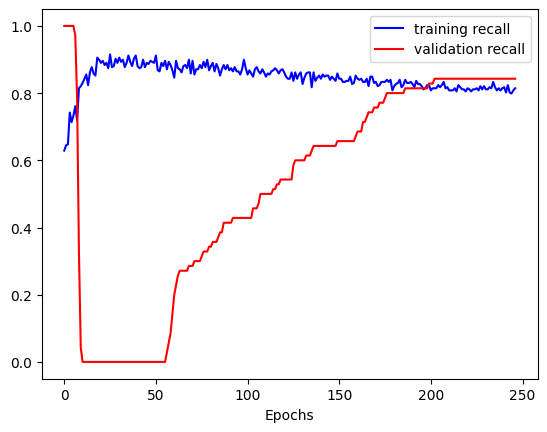

In [54]:
# Visualize train/validation accuracy
accuracy_values = history_dict['recall_5']
val_accuracy_values=history_dict['val_recall_5']
plt.plot(accuracy_values,'-b',label='training recall')
plt.plot(val_accuracy_values,'-r',label='validation recall')
plt.legend()
plt.xlabel("Epochs")

In [55]:
# Predictions
y_pred_ann = model.predict(x_test)
y_pred_ann = (y_pred_ann > 0.5)

1781/1781 [==============================] - 4s 2ms/step


In [ ]:
# Scores
ann_acc_test = metrics.accuracy_score(y_test, y_pred_ann)
ann_precision_test = metrics.precision_score(y_test, y_pred_ann)
ann_recall_test = metrics.recall_score(y_test, y_pred_ann)
ann_f1_test = metrics.f1_score(y_test, y_pred_ann)

print("Accuracy ANN:",metrics.accuracy_score(y_test, y_pred_ann))
print("Precision ANN:",metrics.precision_score(y_test, y_pred_ann))
print("Recall ANN:",metrics.recall_score(y_test, y_pred_ann))
print("F1 Score ANN:",metrics.f1_score(y_test, y_pred_ann))

add_model_eval('ANN',ann_acc_test, ann_precision_test, ann_recall_test, ann_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy ANN: 0.9994382219725431
Precision ANN: 0.875
Recall ANN: 0.8076923076923077
F1 Score ANN: 0.8400000000000001


,model,acc_test,precision_test,recall_test,f1_score_test
0,LightGBM,1.00,1.00,0.82,0.90
1,SVM,1.00,0.88,0.81,0.84
2,XGB,1.00,1.00,0.81,0.89
3,ANN,1.00,0.88,0.81,0.84
4,Random Forest,1.00,0.99,0.80,0.88
5,MLP,1.00,0.91,0.79,0.85
6,Logistic Regression,1.00,0.89,0.49,0.63


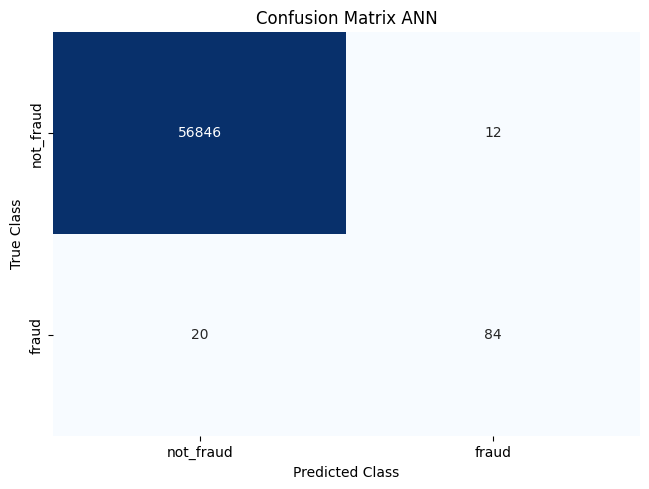

In [ ]:
# CM matrix
matrix_ann = confusion_matrix(y_test, y_pred_ann)
cm_ann = pd.DataFrame(matrix_ann, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_ann, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix ANN"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [57]:
# AUC
y_pred_ann_proba = model.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_ann_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC ANN: ', auc_keras)

1781/1781 [==============================] - 6s 3ms/step
AUC ANN:  0.9330926809568778


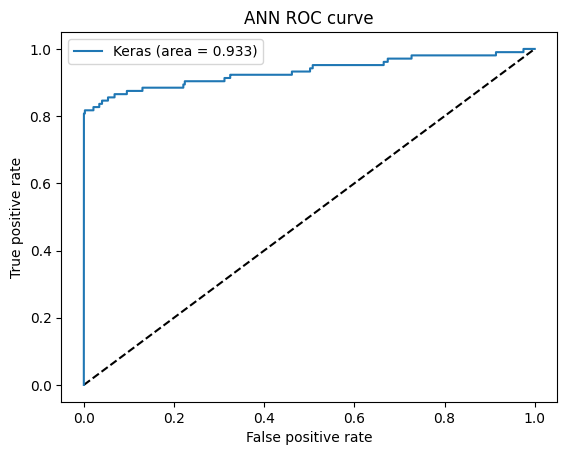

In [58]:
# ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label=f'Keras (area = {auc_keras:.3f})')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ANN ROC curve')
plt.legend(loc='best')
plt.show()

# LightGBM + Oversampling

오버샘플링된 데이터를 가장 성능이 좋았던 LGBM 모델에 학습시킨 뒤 성능을 평가합니다.

In [ ]:
# Train the model
model6_over = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, verbosity=-1, boost_from_average=False)
lgbm = model6_over.fit(x_train_over, y_train_over)

In [ ]:
# Predictions
y_pred_lgbm = model6_over.predict(x_test)

In [ ]:
# Scores
lgbm_acc_test = metrics.accuracy_score(y_test, y_pred_lgbm)
lgbm_precision_test = metrics.precision_score(y_test, y_pred_lgbm)
lgbm_recall_test = metrics.recall_score(y_test, y_pred_lgbm)
lgbm_f1_test = metrics.f1_score(y_test, y_pred_lgbm)

print("Accuracy LightGBM:",metrics.accuracy_score(y_test, y_pred_lgbm))
print("Precision LightGBM:",metrics.precision_score(y_test, y_pred_lgbm))
print("Recall LightGBM:",metrics.recall_score(y_test, y_pred_lgbm))
print("F1 Score LightGBM:",metrics.f1_score(y_test, y_pred_lgbm))

add_model_eval('LightGBM + over', lgbm_acc_test, lgbm_precision_test, lgbm_recall_test, lgbm_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy LightGBM: 0.9995435553526912
Precision LightGBM: 0.9239130434782609
Recall LightGBM: 0.8173076923076923
F1 Score LightGBM: 0.8673469387755101


,model,acc_test,precision_test,recall_test,f1_score_test
0,LightGBM,1.00,1.00,0.82,0.90
1,LightGBM + over,1.00,0.92,0.82,0.87
2,SVM,1.00,0.88,0.81,0.84
3,XGB,1.00,1.00,0.81,0.89
4,ANN,1.00,0.88,0.81,0.84
5,Random Forest,1.00,0.99,0.80,0.88
6,MLP,1.00,0.91,0.79,0.85
7,Logistic Regression,1.00,0.89,0.49,0.63


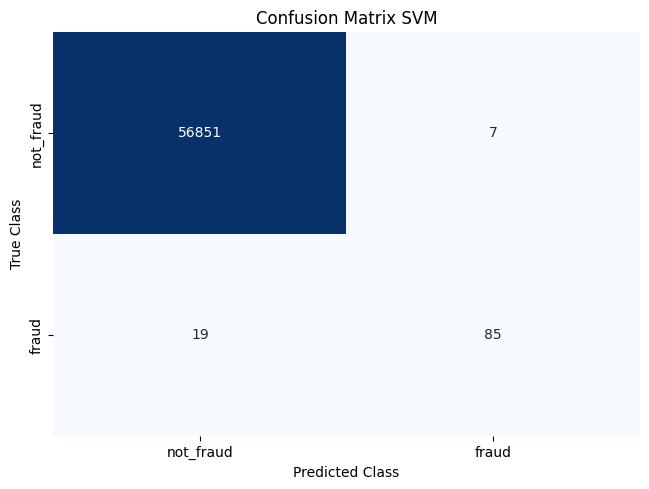

In [ ]:
# CM matrix
matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
cm_lgbm = pd.DataFrame(matrix_lgbm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_lgbm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# LightGBM + Undersampling

언더샘플링된 데이터를 가장 성능이 좋았던 LGBM 모델에 학습시킨 뒤 성능을 평가합니다.

In [ ]:
# Train the model
model6_under = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, verbosity=-1, boost_from_average=False)
lgbm = model6_under.fit(x_train_under, y_train_under)

In [ ]:
# Predictions
y_pred_lgbm = model6_under.predict(x_test)

In [ ]:
# Scores
lgbm_acc_test = metrics.accuracy_score(y_test, y_pred_lgbm)
lgbm_precision_test = metrics.precision_score(y_test, y_pred_lgbm)
lgbm_recall_test = metrics.recall_score(y_test, y_pred_lgbm)
lgbm_f1_test = metrics.f1_score(y_test, y_pred_lgbm)

print("Accuracy LightGBM:",metrics.accuracy_score(y_test, y_pred_lgbm))
print("Precision LightGBM:",metrics.precision_score(y_test, y_pred_lgbm))
print("Recall LightGBM:",metrics.recall_score(y_test, y_pred_lgbm))
print("F1 Score LightGBM:",metrics.f1_score(y_test, y_pred_lgbm))

add_model_eval('LightGBM + under', lgbm_acc_test, lgbm_precision_test, lgbm_recall_test, lgbm_f1_test)
df_metrics_table = view_models_eval(df_metrics_table)
display(df_metrics_table)

Accuracy LightGBM: 0.9901864400828623
Precision LightGBM: 0.14173228346456693
Recall LightGBM: 0.8653846153846154
F1 Score LightGBM: 0.24357239512855208


,model,acc_test,precision_test,recall_test,f1_score_test
0,LightGBM + under,0.99,0.14,0.87,0.24
1,LightGBM,1.00,1.00,0.82,0.90
2,LightGBM + over,1.00,0.92,0.82,0.87
3,SVM,1.00,0.88,0.81,0.84
4,XGB,1.00,1.00,0.81,0.89
5,ANN,1.00,0.88,0.81,0.84
6,Random Forest,1.00,0.99,0.80,0.88
7,MLP,1.00,0.91,0.79,0.85
8,Logistic Regression,1.00,0.89,0.49,0.63


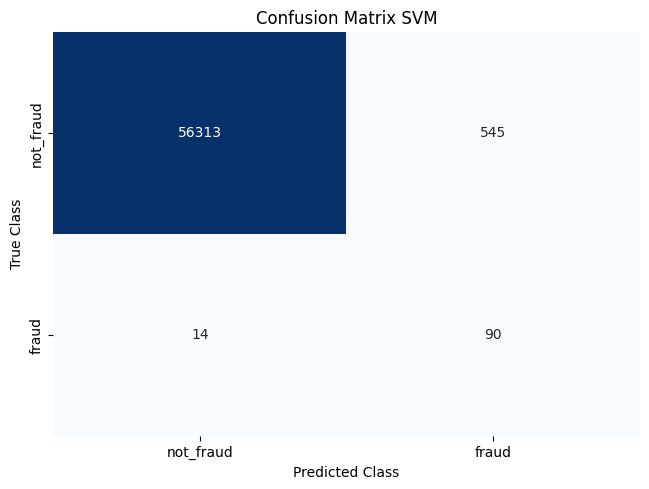

In [ ]:
# CM matrix
matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
cm_lgbm = pd.DataFrame(matrix_lgbm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_lgbm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# Final Metric Table

In [ ]:
df_metrics_table.to_csv('/content/drive/MyDrive/메타코드 프로젝트/final/metrics_table_042610.csv', index=False)

In [ ]:
df_metrics_table = pd.read_csv("/content/drive/MyDrive/메타코드 프로젝트/final/metrics_table_042610.csv")
df_metrics_table

,model,acc_test,precision_test,recall_test,f1_score_test
0,LightGBM + under,0.99,0.14,0.87,0.24
1,LightGBM,1.00,1.00,0.82,0.90
2,LightGBM + over,1.00,0.92,0.82,0.87
3,SVM,1.00,0.88,0.81,0.84
4,XGB,1.00,1.00,0.81,0.89
5,ANN,1.00,0.88,0.81,0.84
6,Random Forest,1.00,0.99,0.80,0.88
7,MLP,1.00,0.91,0.79,0.85
8,Logistic Regression,1.00,0.89,0.49,0.63


일반적으로 부스팅계열 모델의 성능이 좋았으며, undersampling/oversampling은 성능향상에 도움이 되지 않았습니다.

In [ ]:
metrics_table = df_metrics_table.melt(id_vars='model', value_vars=['precision_test','recall_test','f1_score_test'], value_name='score', var_name='metric')
metrics_table.head()

,model,metric,score
0,LightGBM + under,precision_test,0.14
1,LightGBM,precision_test,1.00
2,LightGBM + over,precision_test,0.92
3,SVM,precision_test,0.88
4,XGB,precision_test,1.00


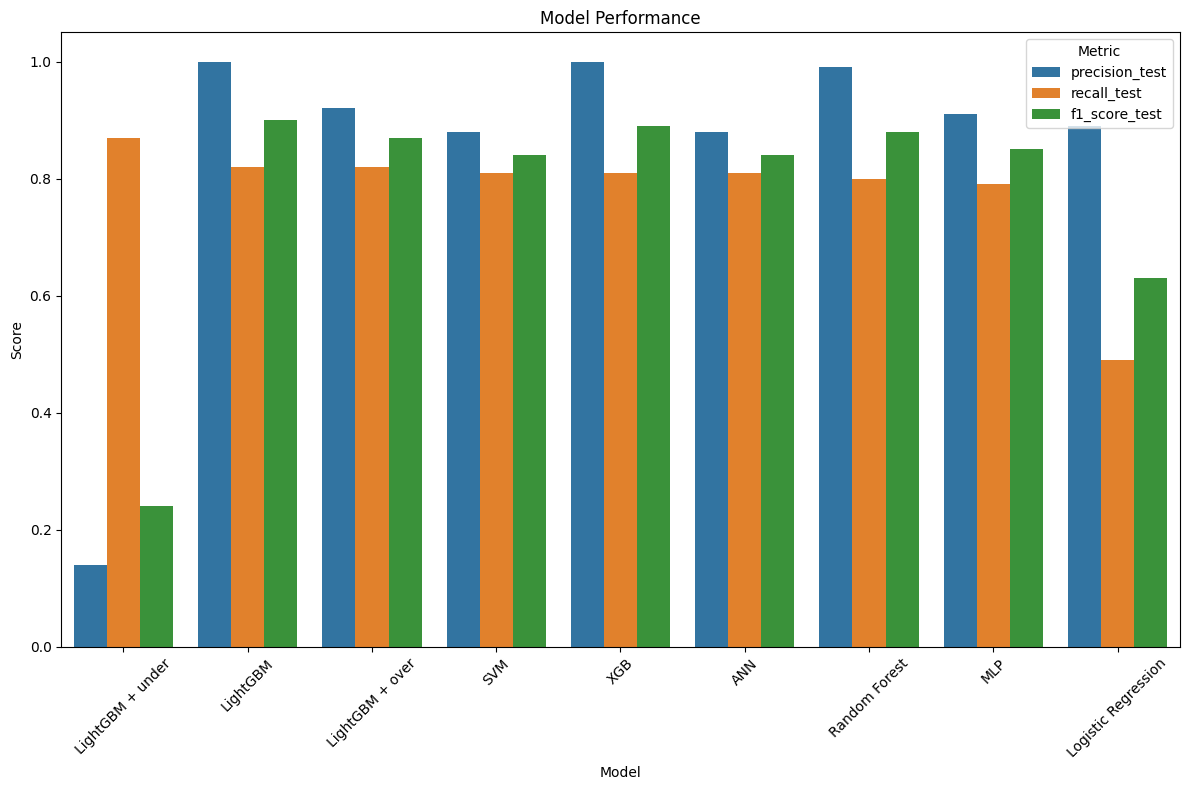

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="model", y="score", data=metrics_table, hue='metric')
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

<앞으로 더 해보고 싶은 것들>  
- Grid search  
- 5 fold cross-validation  
- ANN 외에 다른 딥러닝 기법 적용 (ex.AutoEncoder)
- 각 모델의 하이퍼파라미터에 대해 깊게 공부한 뒤 튜닝 수행